# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
renda = pd.read_csv('previsao_de_renda.csv')
renda = renda.drop('Unnamed: 0', axis=1)
renda = renda.drop('index', axis=1)

renda.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
renda.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


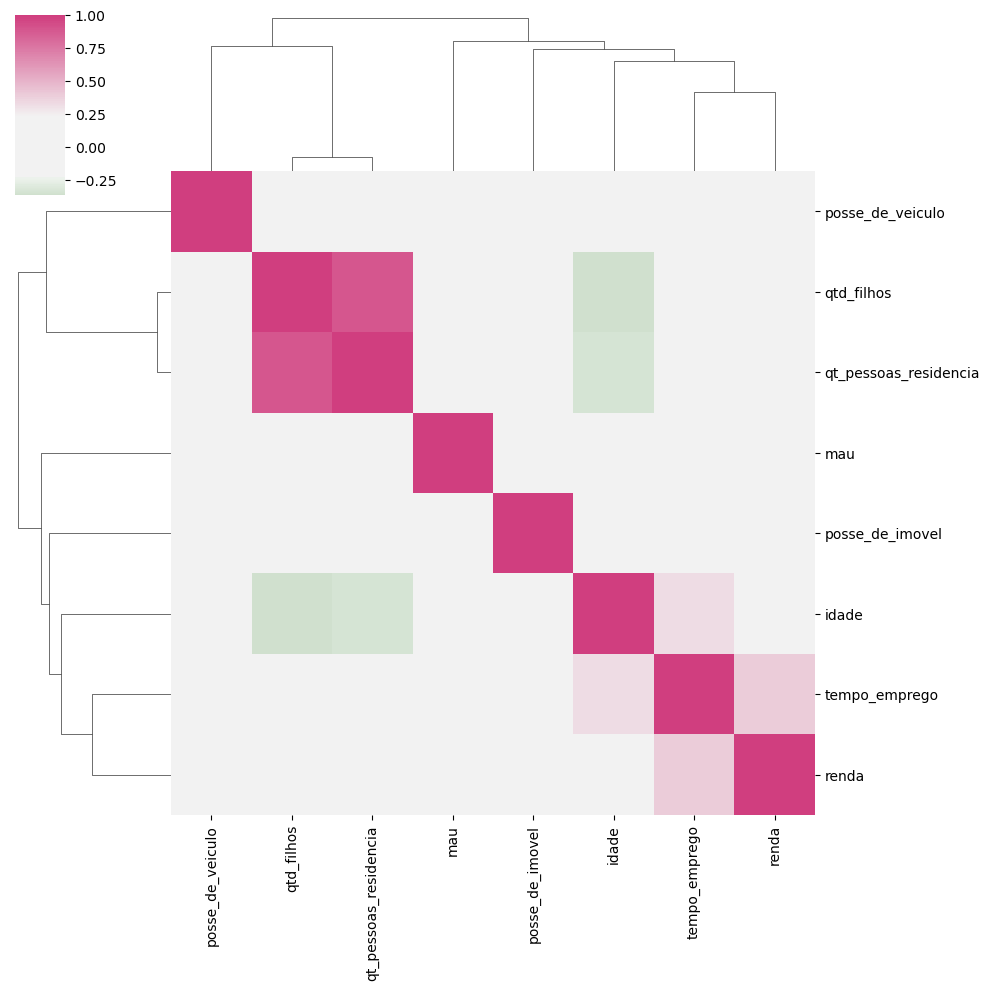

In [4]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(renda.corr(), figsize=(10, 10), center = 0,cmap=cmap)
plt.show()

A partir do gráfico acima podemos ver que a variável que mais tem correlação com renda é o tempo de emprego.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [35]:
renda_rank = pd.concat([renda, renda.rank()], axis = 1)

renda_rank.columns = [ 'data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'mau', 'renda', 'data_rank', 'sexo_rank', 'posse_de_veiculo_rank', 'posse_de_imovel_rank', 'qtd_filhos_rank',
       'tipo_renda_rank', 'educacao_rank', 'estado_civil_rank', 'tipo_residencia_rank', 'idade_rank',
       'tempo_emprego_rank', 'qt_pessoas_residencia_rank', 'mau_rank', 'renda_rank']

renda_rank.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,data_rank,sexo_rank,...,qtd_filhos_rank,tipo_renda_rank,educacao_rank,estado_civil_rank,tipo_residencia_rank,idade_rank,tempo_emprego_rank,qt_pessoas_residencia_rank,mau_rank,renda_rank
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414,0.002374,0.373288,...,0.110679,-0.088072,0.096391,-0.156325,0.015777,-0.155356,-0.057197,0.164103,-0.017617,0.090042
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827,0.003583,-0.044192,...,-0.008578,0.051816,-0.023048,-0.018157,-0.186821,0.120780,-0.008914,-0.011885,-0.022499,0.043893
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567,0.015561,0.126175,...,0.921580,-0.126582,0.055352,-0.150125,0.027462,-0.364443,-0.033872,0.780250,0.009544,0.025169
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570,-0.004344,-0.218183,...,-0.416325,0.344724,-0.178577,0.052060,-0.101543,0.996999,0.250460,-0.352679,-0.011087,0.018163
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235,-0.002151,-0.146123,...,-0.091073,0.059301,-0.022111,-0.005854,-0.020686,0.323543,0.885458,-0.071998,-0.047722,0.352134
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977,0.016462,0.159661,...,0.837686,-0.121504,0.037859,-0.457810,0.014543,-0.336830,-0.015238,0.950684,-0.001555,0.038865
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577,0.018802,0.010563,...,0.003923,0.005890,0.018208,0.031516,-0.009283,-0.012397,-0.058238,-0.007845,1.000000,-0.016933
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000,0.007711,0.180722,...,0.005835,0.005434,0.052106,-0.041029,-0.038250,0.048215,0.301799,0.020812,-0.011577,0.754549
data_rank,0.002374,0.003583,0.015561,-0.004344,-0.002151,0.016462,0.018802,0.007711,1.000000,-0.002014,...,0.011149,-0.009485,0.152863,-0.013543,-0.004118,-0.003474,0.002260,0.013874,0.018802,0.005647
sexo_rank,0.373288,-0.044192,0.126175,-0.218183,-0.146123,0.159661,0.010563,0.180722,-0.002014,1.000000,...,0.133106,-0.147252,0.015064,-0.139764,0.012593,-0.217866,-0.114283,0.165920,0.010563,0.238541


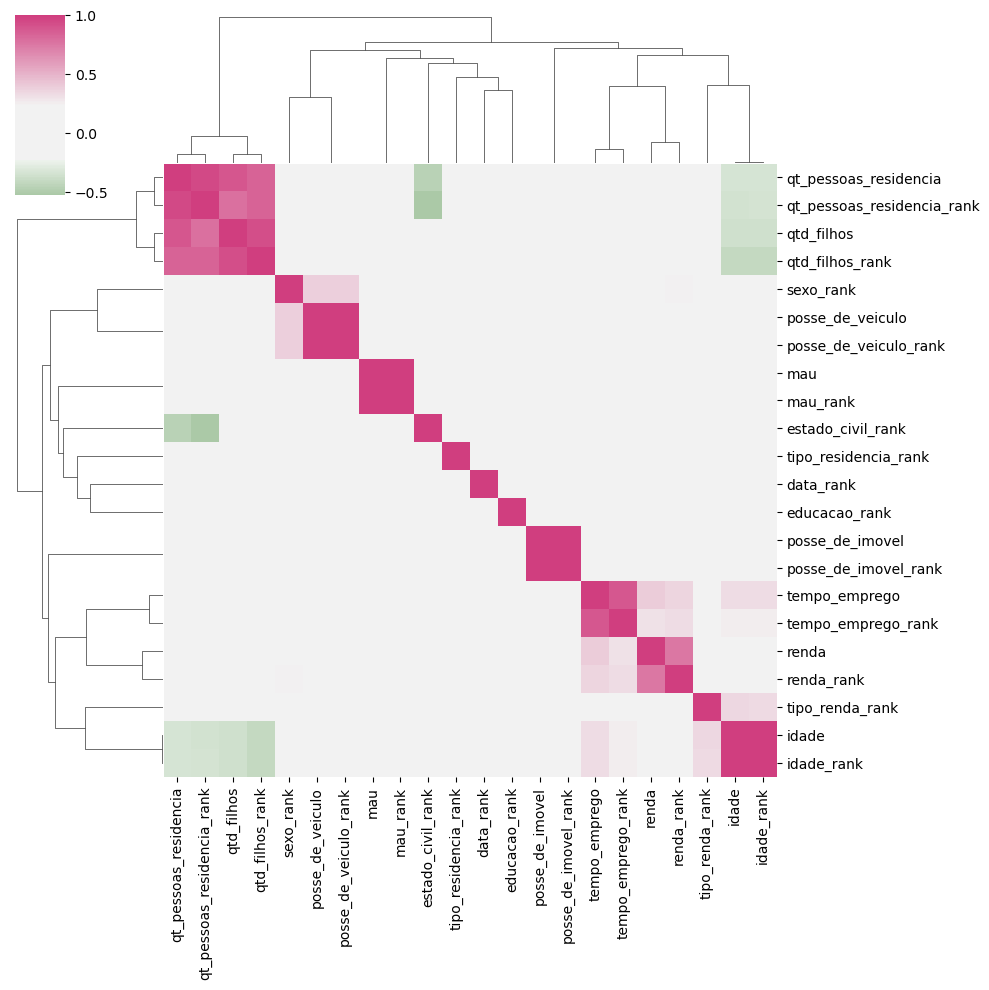

In [36]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(renda_rank.corr(), figsize=(10, 10), center = 0,cmap=cmap)
plt.show()

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

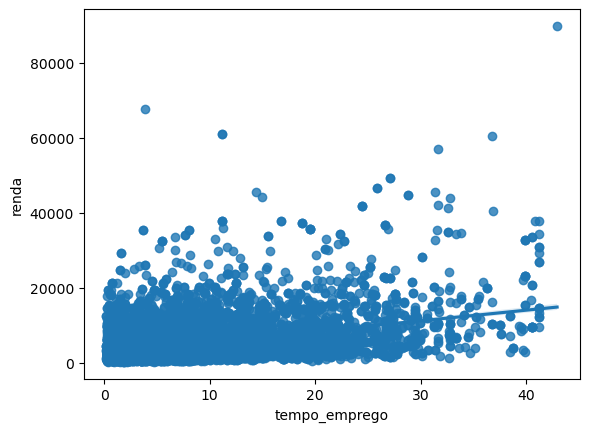

In [41]:
sns.regplot(x='tempo_emprego', y='renda', data = renda_rank)

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda_rank'>

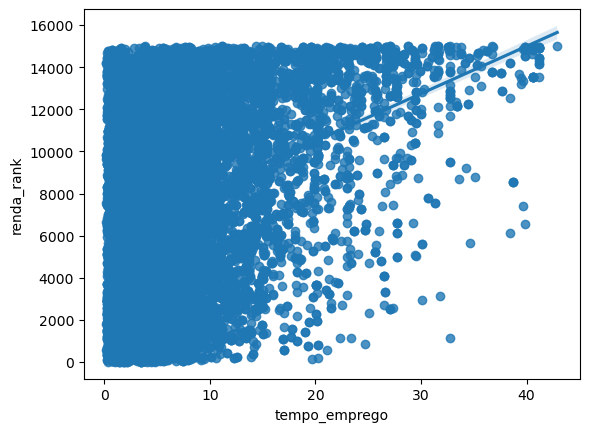

In [44]:
sns.regplot(x='tempo_emprego', y='renda_rank', data = renda_rank)

3) Na sua opinião, há outliers na variável renda?

Sim, há uma correlação entre tempo de emprego e renda porém a correlação é muito baixa e poluida.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [47]:
renda_log = renda_rank.copy()
renda_log['log_renda'] = np.log(renda_log['renda_rank'])
renda_log.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,data_rank,sexo_rank,...,tipo_renda_rank,educacao_rank,estado_civil_rank,tipo_residencia_rank,idade_rank,tempo_emprego_rank,qt_pessoas_residencia_rank,mau_rank,renda_rank,log_renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414,0.002374,0.373288,...,-0.088072,0.096391,-0.156325,0.015777,-0.155356,-0.057197,0.164103,-0.017617,0.090042,0.087846
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827,0.003583,-0.044192,...,0.051816,-0.023048,-0.018157,-0.186821,0.120780,-0.008914,-0.011885,-0.022499,0.043893,0.046328
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567,0.015561,0.126175,...,-0.126582,0.055352,-0.150125,0.027462,-0.364443,-0.033872,0.780250,0.009544,0.025169,0.026043
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570,-0.004344,-0.218183,...,0.344724,-0.178577,0.052060,-0.101543,0.996999,0.250460,-0.352679,-0.011087,0.018163,0.009663
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235,-0.002151,-0.146123,...,0.059301,-0.022111,-0.005854,-0.020686,0.323543,0.885458,-0.071998,-0.047722,0.352134,0.281299
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977,0.016462,0.159661,...,-0.121504,0.037859,-0.457810,0.014543,-0.336830,-0.015238,0.950684,-0.001555,0.038865,0.035084
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577,0.018802,0.010563,...,0.005890,0.018208,0.031516,-0.009283,-0.012397,-0.058238,-0.007845,1.000000,-0.016933,-0.011473
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000,0.007711,0.180722,...,0.005434,0.052106,-0.041029,-0.038250,0.048215,0.301799,0.020812,-0.011577,0.754549,0.554232
data_rank,0.002374,0.003583,0.015561,-0.004344,-0.002151,0.016462,0.018802,0.007711,1.000000,-0.002014,...,-0.009485,0.152863,-0.013543,-0.004118,-0.003474,0.002260,0.013874,0.018802,0.005647,-0.000292
sexo_rank,0.373288,-0.044192,0.126175,-0.218183,-0.146123,0.159661,0.010563,0.180722,-0.002014,1.000000,...,-0.147252,0.015064,-0.139764,0.012593,-0.217866,-0.114283,0.165920,0.010563,0.238541,0.211278


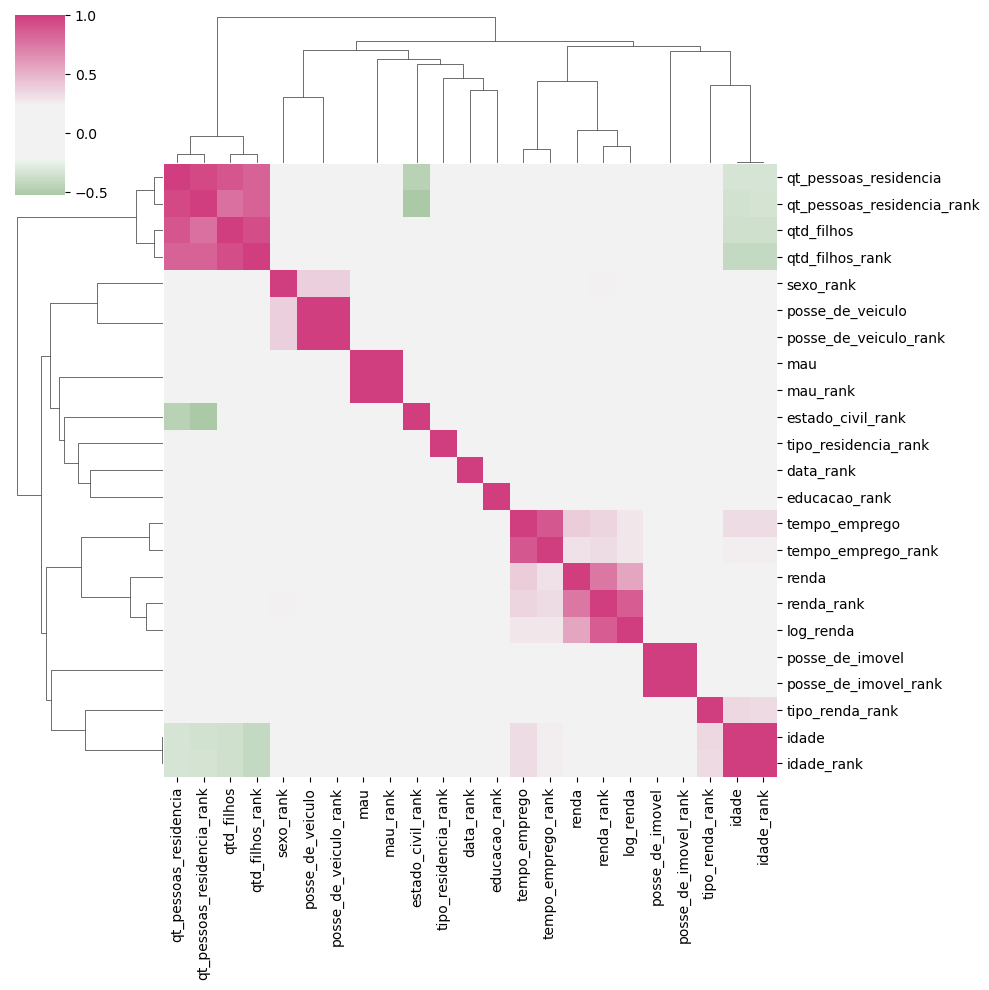

In [48]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(renda_log.corr(), figsize=(10, 10), center = 0,cmap=cmap)
plt.show()

<AxesSubplot:xlabel='tempo_emprego', ylabel='log_renda'>

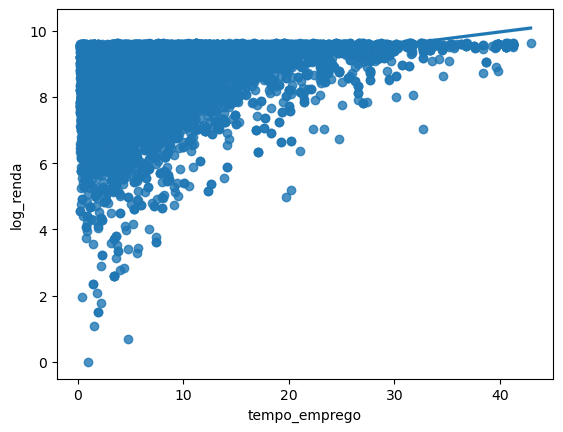

In [50]:
sns.regplot(x='tempo_emprego', y='log_renda', data = renda_log)

<AxesSubplot:xlabel='renda_rank', ylabel='log_renda'>

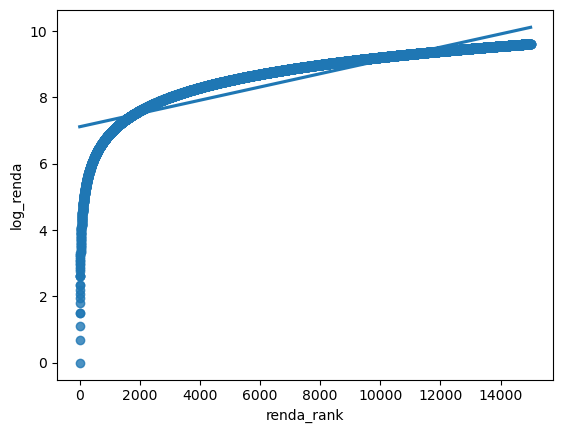

In [53]:
sns.regplot(x='renda_rank', y='log_renda', data = renda_log)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

No caso da variável renda não houve mudança, continuamos com outliers com relacionar a variável interesse com as demais após aplicação do método log, mesmo com auxílio visual dos gráficos os resultados ainda apresentam correlação baixa e gráficos poluídos. 